# **PROJECT TITLE: AIRCRAFT RISK ANALYSIS**

1. OVERVIEW

1.1 Introduction:
This project gives a risk analysis of the prevalence of accidents of various aircraft models to provide insights on low risk aircrafts to an investor. 

1.2 Business understanding:
There is often a lack of information on risk analysis of aircrafts to investors who may wish to venture into the industry. By analyzing this data, i intend to demonstrate the aircrafts that have a low risk of accidents hence guide in decision making.

Key questions:
What make of aircraft make is prone to more accidents?
What is the effect of weather conditions on aircraft damages?
What is the relationship between the purpose of the flight, make and aircraft damages?

1.3 Data understanding:

This dataset dates from 1962 to 1993 on various aircraft model accidents across the world. The database has various parameters that have been populated to give information on the circumstances when the accidents took place however some parameters are missing information. This notwithstanding, not all parameters will be relevant to inform recommendations to the Company hence some of the data will be dropped.



2. IMPORTING LIBRARIES

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

3. LOADING THE DATA

In [ ]:
# Load the dataset and preview data

df_aviation = pd.read_csv("/Users/kvt/phase1/Phase-1-Project/Aviation_data/AviationData.csv", encoding="latin1", low_memory=False)
df_aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
df_aviation.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


4. DATA EXPLORATION

In [ ]:
# Understand the structure of the data, check for missing values and review the data types and key statistics

In [4]:
# To obtain summary of the metadata of the data frame

df_aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

5. DATA CLEANING

In [ ]:
# Handle missing values and ensure data types are appropriate for analysis

In [5]:
#Identify and drop columns that i will not need for the analysis and drop them

columns_to_drop = ['Event.Id', 'Event.Date', 'Country', 'Engine.Type', 'Accident.Number','Location', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name','Aircraft.Category', 'Registration.Number','Model','Amateur.Built','Schedule','FAR.Description','Air.carrier', 'Report.Status','Publication.Date','Broad.phase.of.flight','Number.of.Engines','Injury.Severity']
df_aviation = df_aviation.drop(columns=columns_to_drop)


In [6]:
# Confirm that the columns that i do not need, have been dropped

df_aviation.head()

,Investigation.Type,Aircraft.damage,Make,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,Accident,Destroyed,Stinson,Personal,2.0,0.0,0.0,0.0,UNK
1,Accident,Destroyed,Piper,Personal,4.0,0.0,0.0,0.0,UNK
2,Accident,Destroyed,Cessna,Personal,3.0,NaN,NaN,NaN,IMC
3,Accident,Destroyed,Rockwell,Personal,2.0,0.0,0.0,0.0,IMC
4,Accident,Destroyed,Cessna,Personal,1.0,2.0,NaN,0.0,VMC


In [7]:
df_aviation.shape

(88889, 9)

In [8]:
df_aviation.columns

Index(['Investigation.Type', 'Aircraft.damage', 'Make', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition'],
      dtype='object')

In [9]:
# identify whether there is any missing data
df_aviation.isnull().sum()

Investigation.Type            0
Aircraft.damage            3194
Make                         63
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
dtype: int64

In [10]:
columns_to_fill = ['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries', 'Total.Uninjured']
df_aviation[columns_to_fill] = df_aviation[columns_to_fill].fillna(0)


In [11]:
df_aviation.isnull().sum()

Investigation.Type           0
Aircraft.damage           3194
Make                        63
Purpose.of.flight         6192
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition         4492
dtype: int64

In [12]:
df_aviation.dropna(subset=['Make','Aircraft.damage'],  inplace= True)


In [13]:
df_aviation.isnull().sum()

Investigation.Type           0
Aircraft.damage              0
Make                         0
Purpose.of.flight         4543
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition         3314
dtype: int64

In [14]:
df_aviation.fillna({'Purpose.of.flight':'Unknown'}, inplace= True)
df_aviation.fillna({'Weather.Condition': 'Unknown'}, inplace= True)

In [15]:
df_aviation.isnull().sum()

Investigation.Type        0
Aircraft.damage           0
Make                      0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
dtype: int64

In [16]:
df_aviation.dtypes

Investigation.Type         object
Aircraft.damage            object
Make                       object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
dtype: object

In [17]:
df_aviation.columns

Index(['Investigation.Type', 'Aircraft.damage', 'Make', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition'],
      dtype='object')

6. Exploratory Data Analysis

In [18]:
# Gain insights into key variables, examine relationships between features and identify patterns and anomalies

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

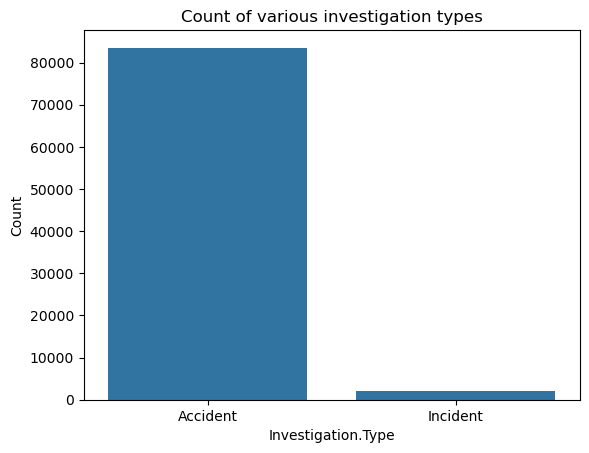

In [20]:
sns.countplot(x='Investigation.Type', data=df_aviation)

plt.title('Count of various investigation types')
plt.xlabel('Investigation.Type')
plt.ylabel('Count')

plt.show()


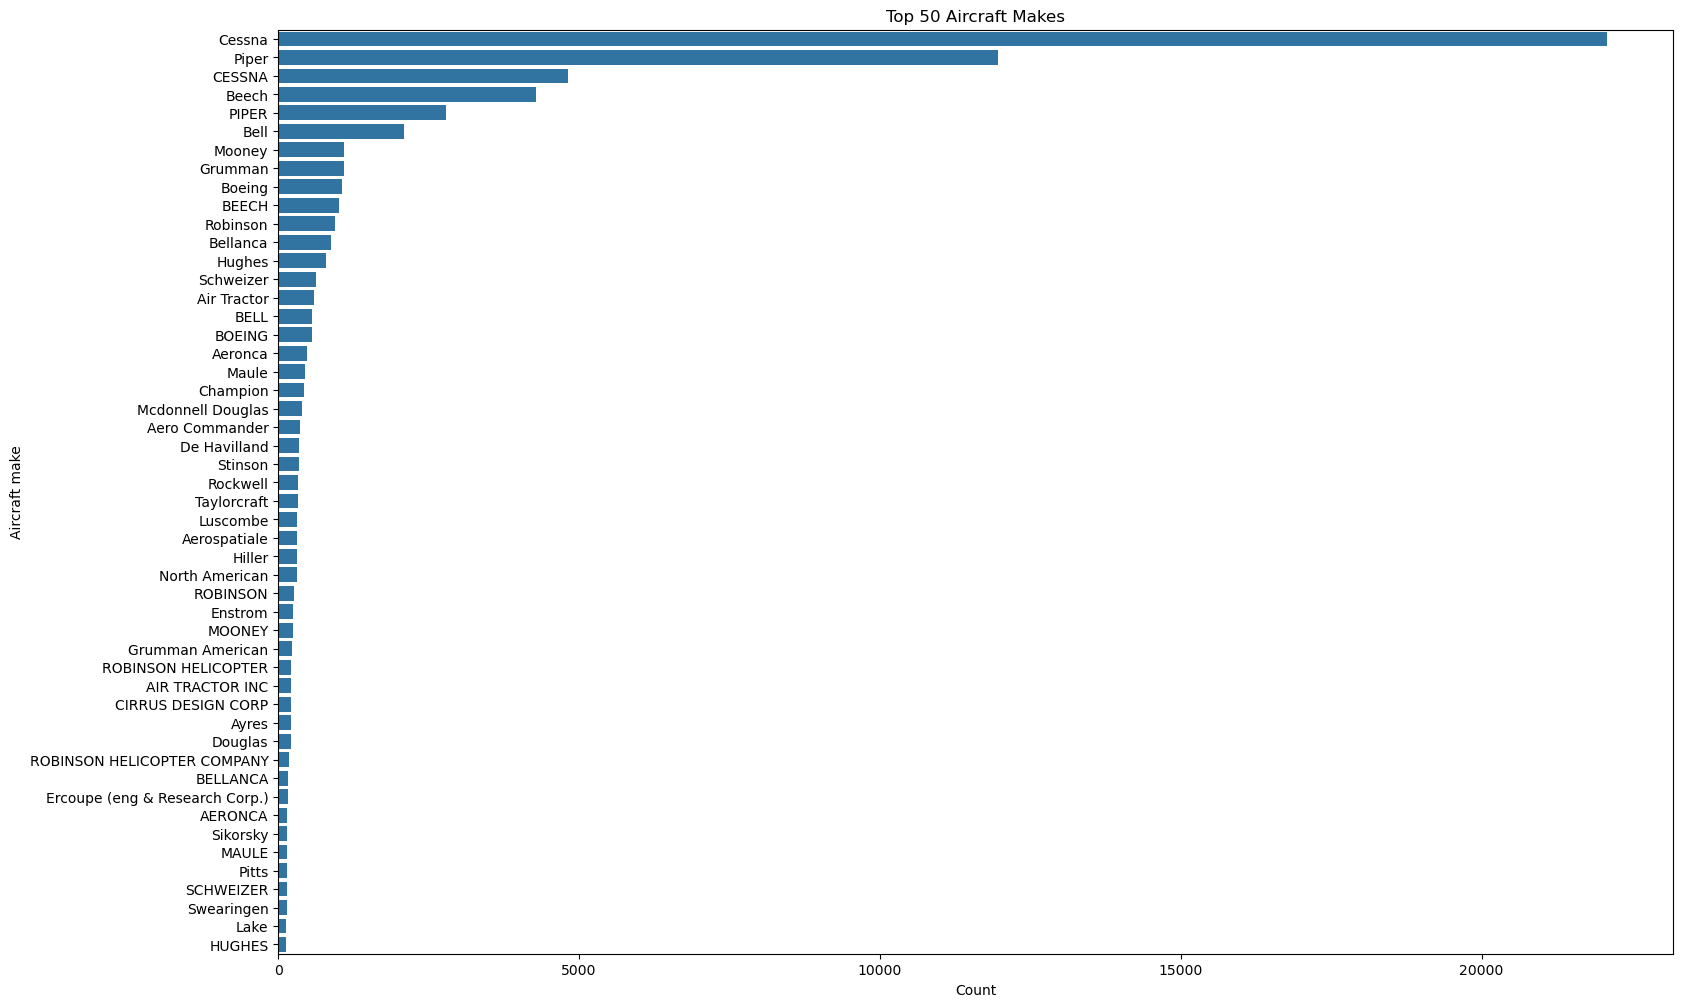

In [21]:
top_50_makes = df_aviation['Make'].value_counts().head(50)

plt.figure(figsize=(18,12))
sns.barplot(y=top_50_makes.index, x=top_50_makes.values)

plt.title('Top 50 Aircraft Makes')
plt.xlabel('Count')
plt.ylabel('Aircraft make')

plt.show()

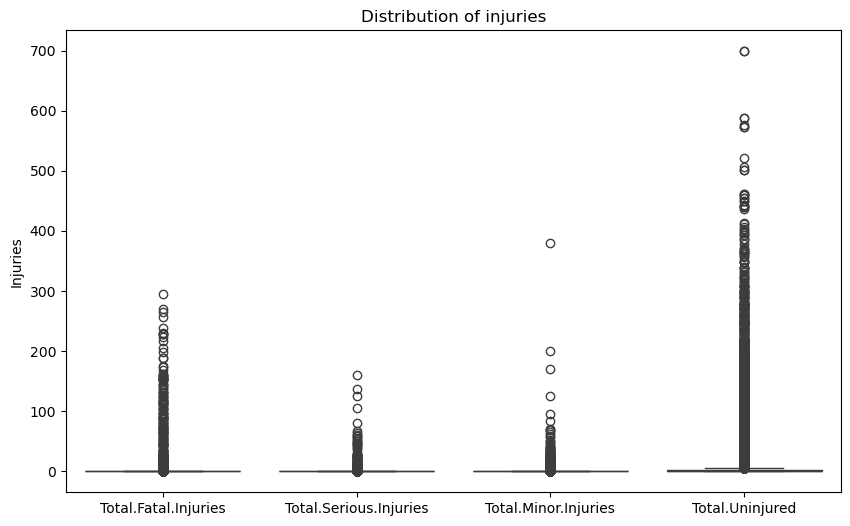

In [22]:
# Distribution of the injuries

columns = ['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']
df_subset = df_aviation[columns]

plt.figure(figsize=(10,6))
sns.boxplot(data=df_aviation)


plt.title('Distribution of injuries')
plt.ylabel('Injuries')

plt.show()

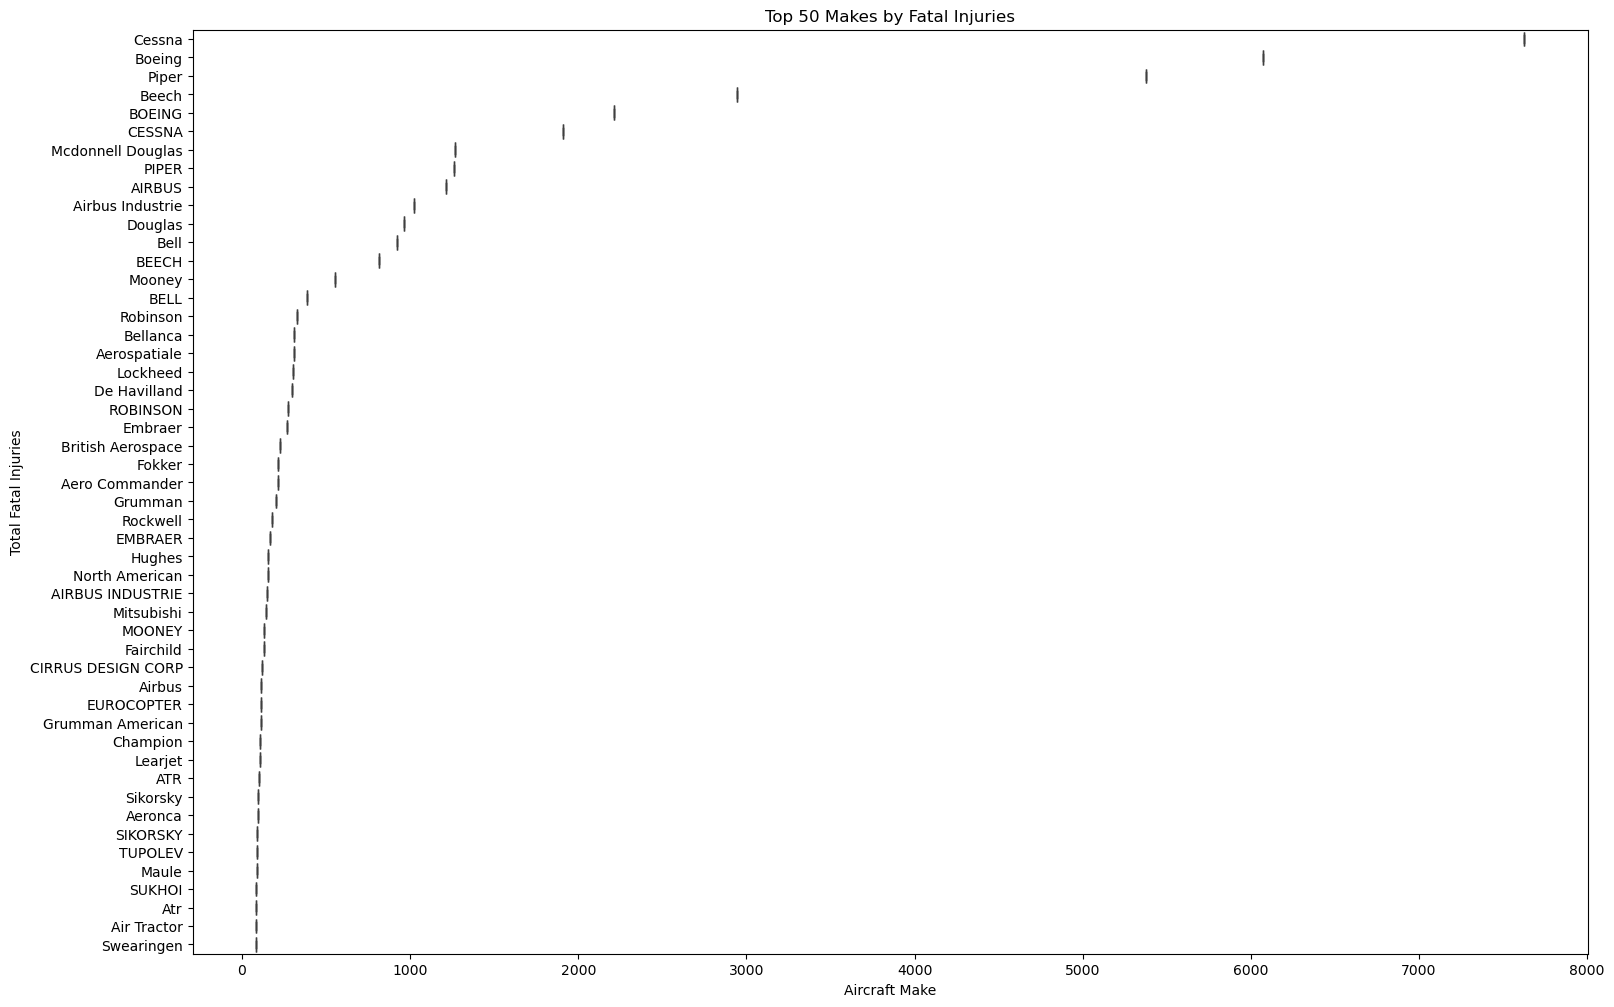

In [23]:
# Plot for fatal injuries

import pandas as pd
import seaborn as snsimport 
import matplotlib.pyplot as plt

make_injuries = df_aviation.groupby('Make')[['Total.Fatal.Injuries']].sum()
make_injuries_sorted = make_injuries.sort_values(by='Total.Fatal.Injuries', ascending=False).head(50)

plt.figure(figsize=(18,12))
sns.boxplot(x='Total.Fatal.Injuries', y=make_injuries_sorted.index, data=make_injuries_sorted)

plt.title('Top 50 Makes by Fatal Injuries')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatal Injuries')

plt.show()


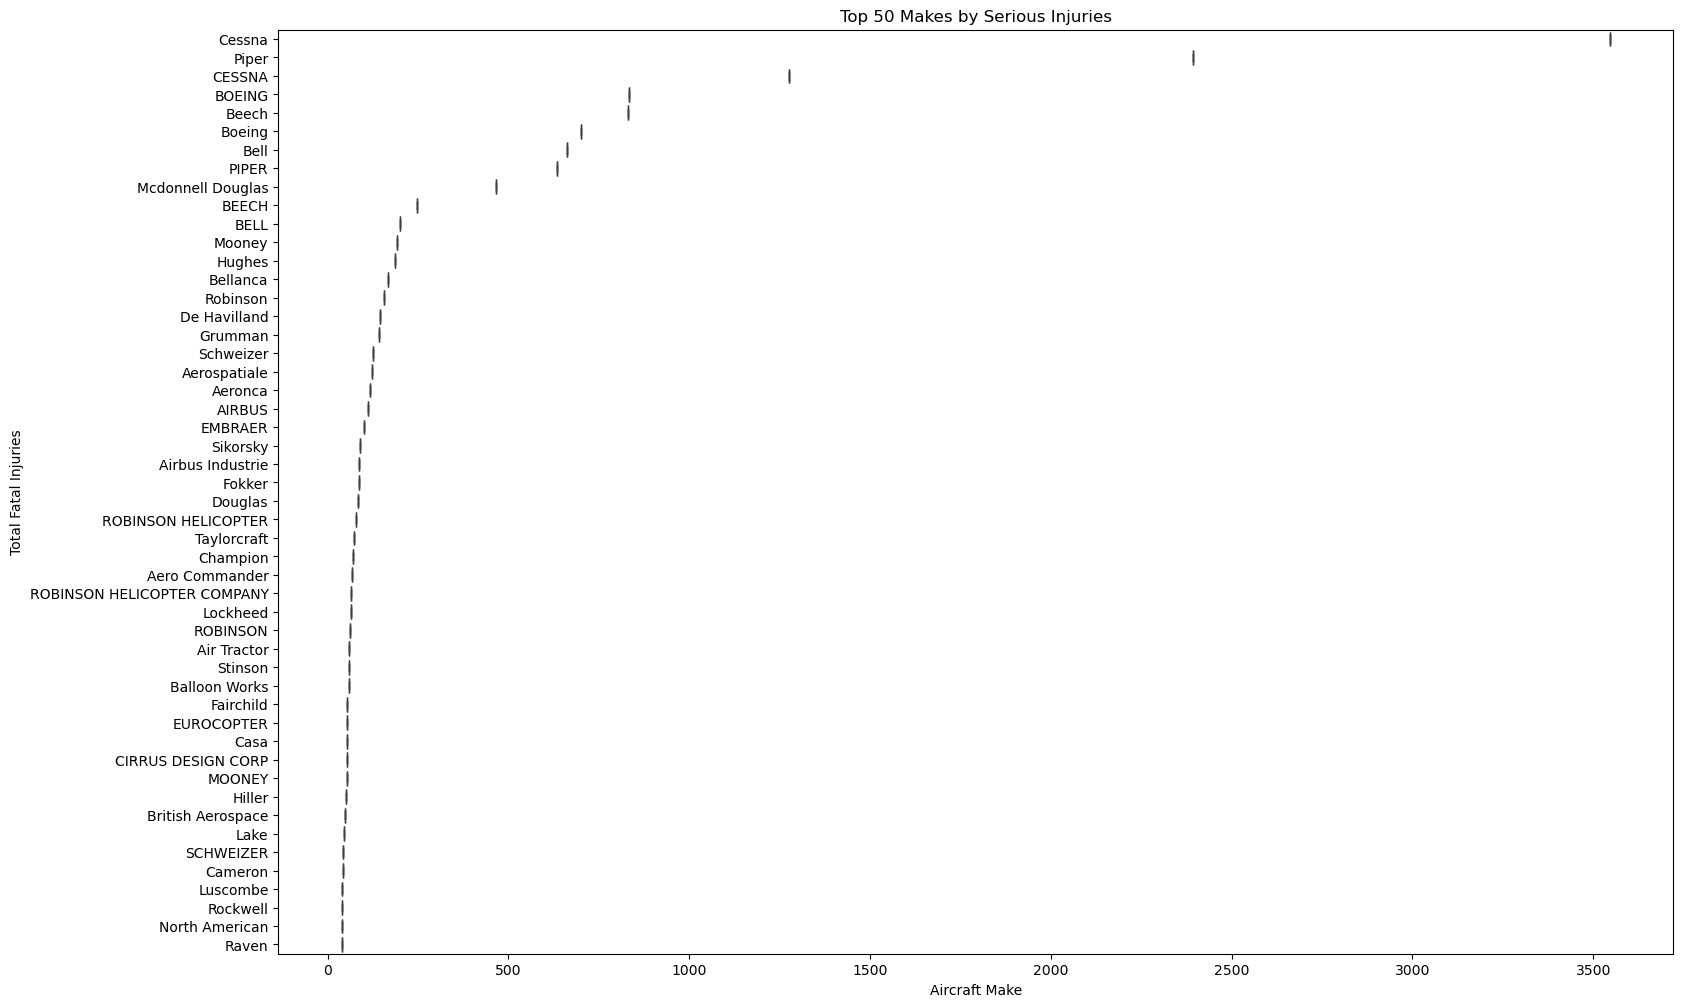

In [24]:
# Plot for serious injuries

import pandas as pd
import seaborn as snsimport 
import matplotlib.pyplot as plt

make_injuries = df_aviation.groupby('Make')[['Total.Serious.Injuries']].sum()
make_injuries_sorted = make_injuries.sort_values(by='Total.Serious.Injuries', ascending=False).head(50)

plt.figure(figsize=(18,12))
sns.boxplot(x='Total.Serious.Injuries', y=make_injuries_sorted.index, data=make_injuries_sorted)

plt.title('Top 50 Makes by Serious Injuries')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatal Injuries')

plt.show()

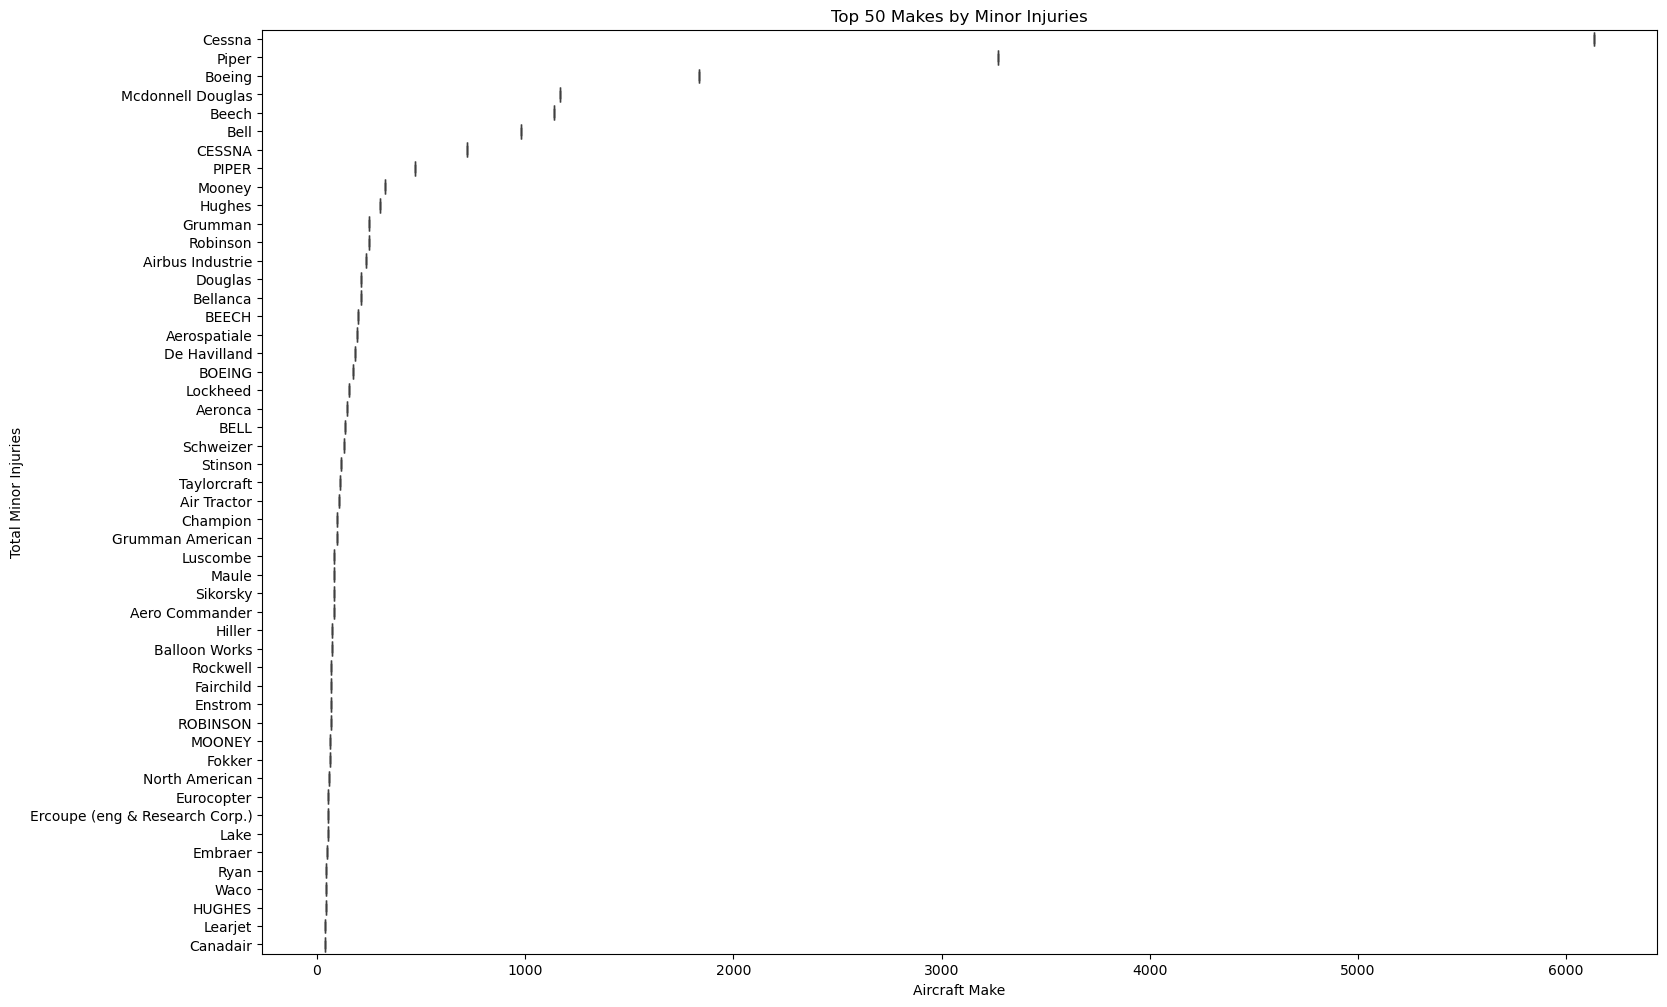

In [25]:
# Plot for minor injuries

import pandas as pd
import seaborn as snsimport 
import matplotlib.pyplot as plt

make_injuries = df_aviation.groupby('Make')[['Total.Minor.Injuries']].sum()
make_injuries_sorted = make_injuries.sort_values(by='Total.Minor.Injuries', ascending=False).head(50)

plt.figure(figsize=(18,12))
sns.boxplot(x='Total.Minor.Injuries', y=make_injuries_sorted.index, data=make_injuries_sorted)

plt.title('Top 50 Makes by Minor Injuries')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Minor Injuries')

plt.show()

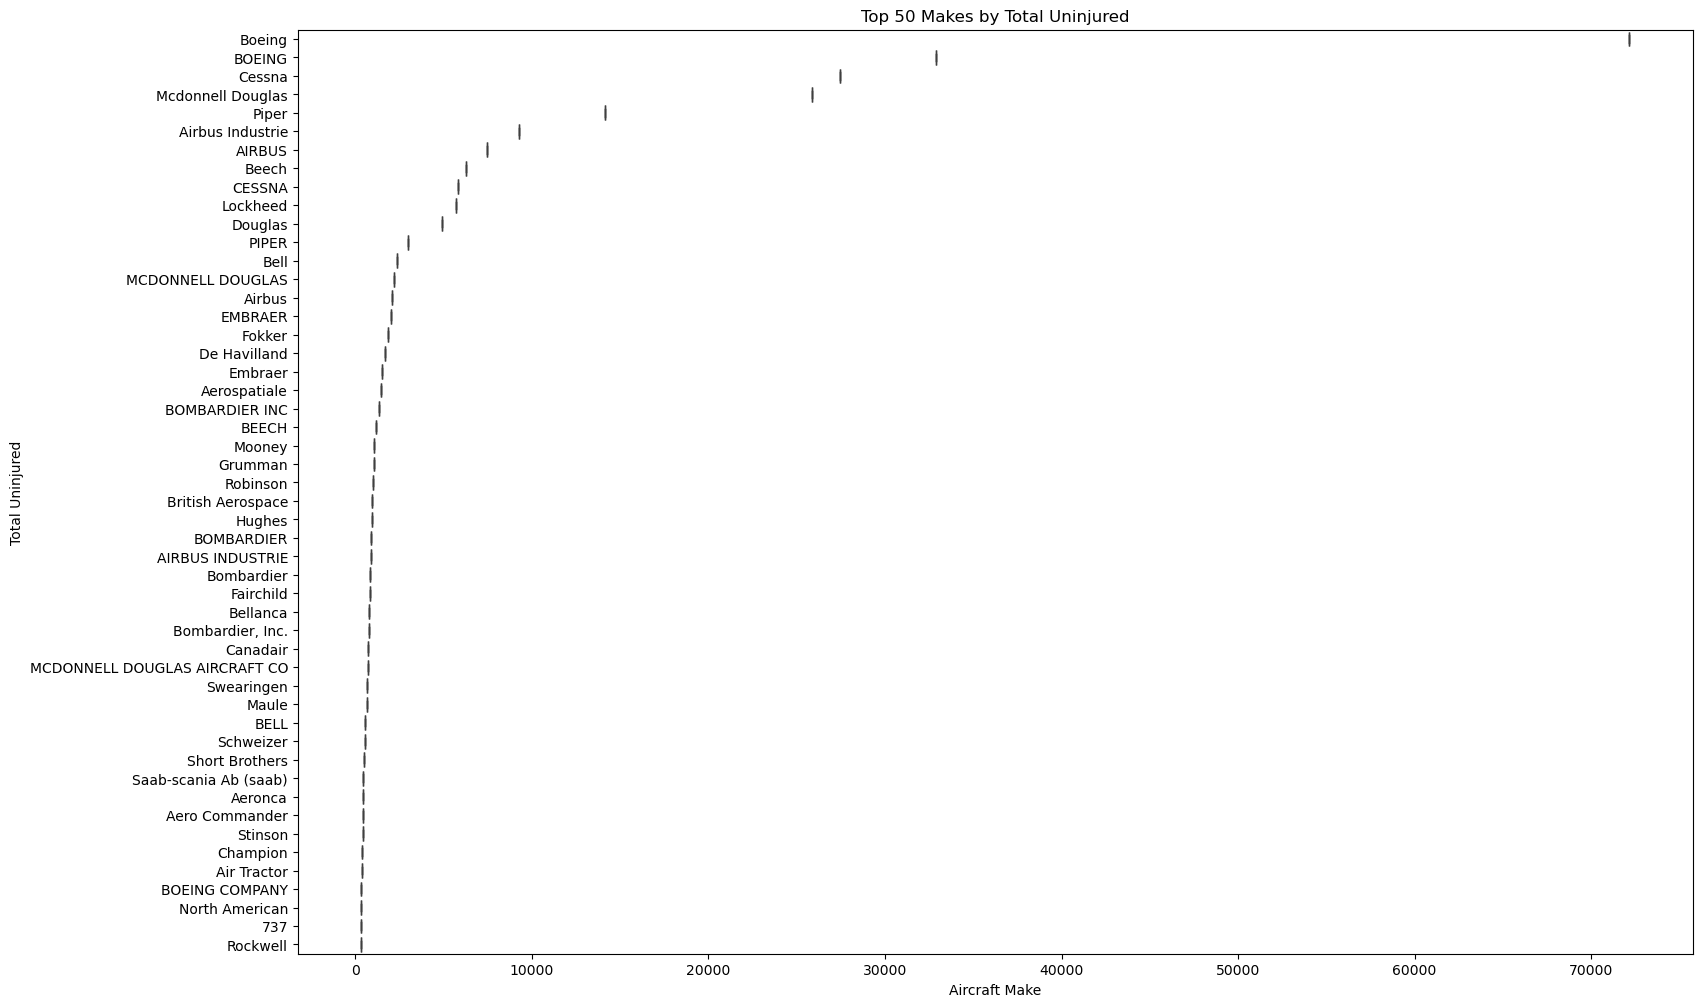

In [26]:
# Plot for uninjured

import pandas as pd
import seaborn as snsimport 
import matplotlib.pyplot as plt

make_injuries = df_aviation.groupby('Make')[['Total.Uninjured']].sum()
make_injuries_sorted = make_injuries.sort_values(by='Total.Uninjured', ascending=False).head(50)

plt.figure(figsize=(18,12))
sns.boxplot(x='Total.Uninjured', y=make_injuries_sorted.index, data=make_injuries_sorted)

plt.title('Top 50 Makes by Total Uninjured')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Uninjured')

plt.show()

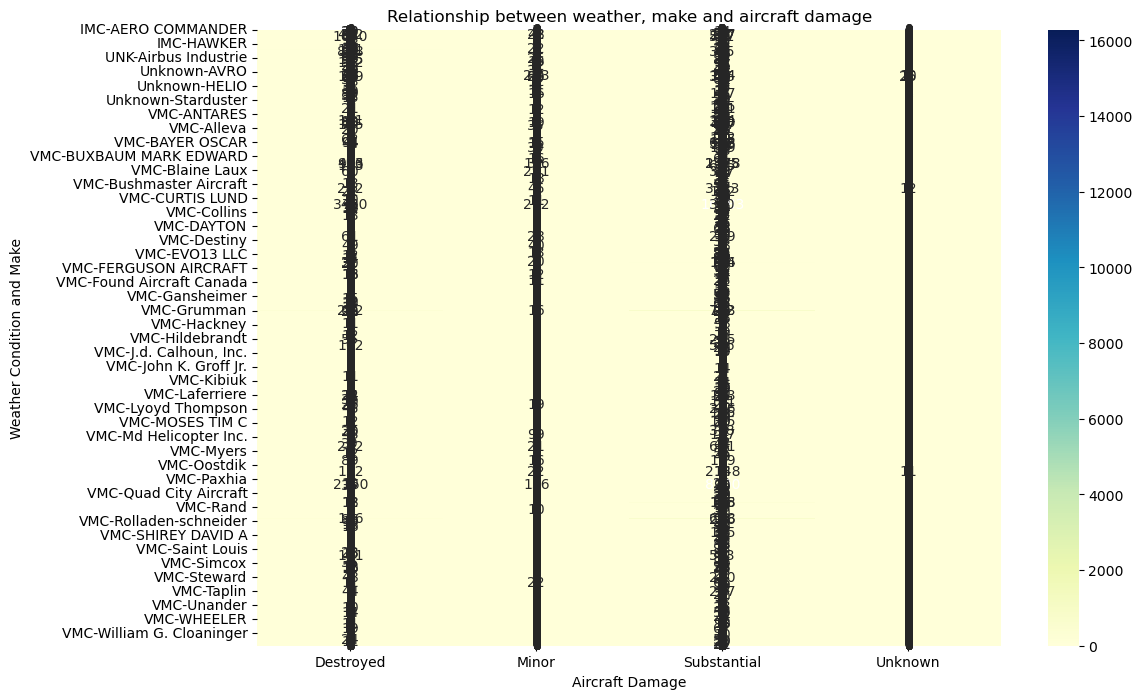

In [ ]:
heatmap_data = pd.crosstab(index=[df_aviation['Weather.Condition'], df_aviation['Make']], columns=df_aviation['Aircraft.damage'])

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")

plt.title("Relationship between weather, make and aircraft damage")
plt.xlabel("Aircraft Damage")
plt.ylabel("Weather Condition and Make")

plt.show()

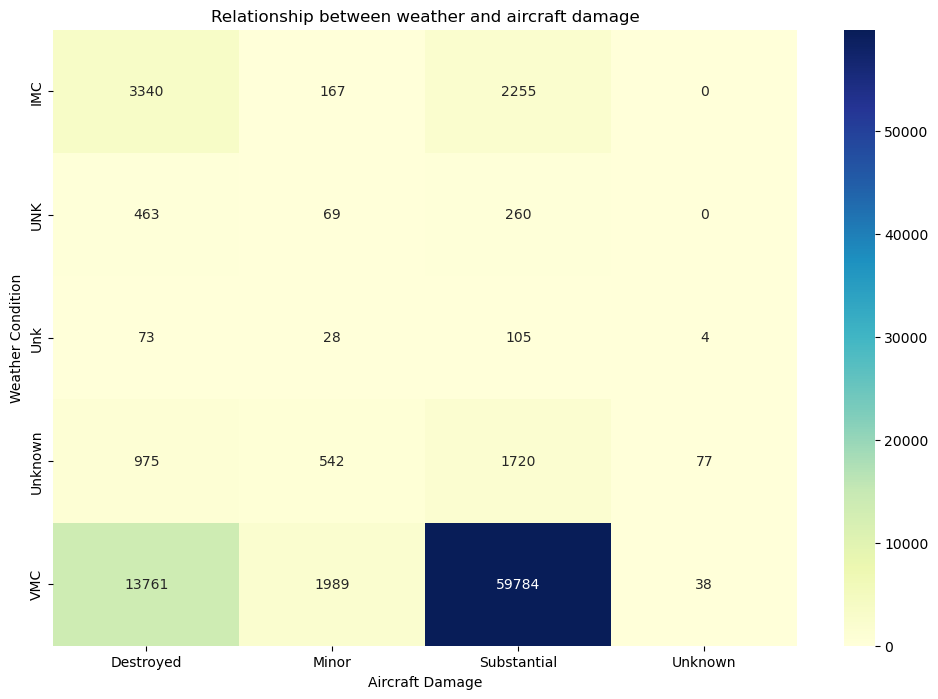

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(crosstab_data, cmap="YlGnBu", annot=True, fmt="d")

plt.title("Relationship between weather and aircraft damage")
plt.xlabel("Aircraft Damage")
plt.ylabel("Weather Condition")

plt.show()

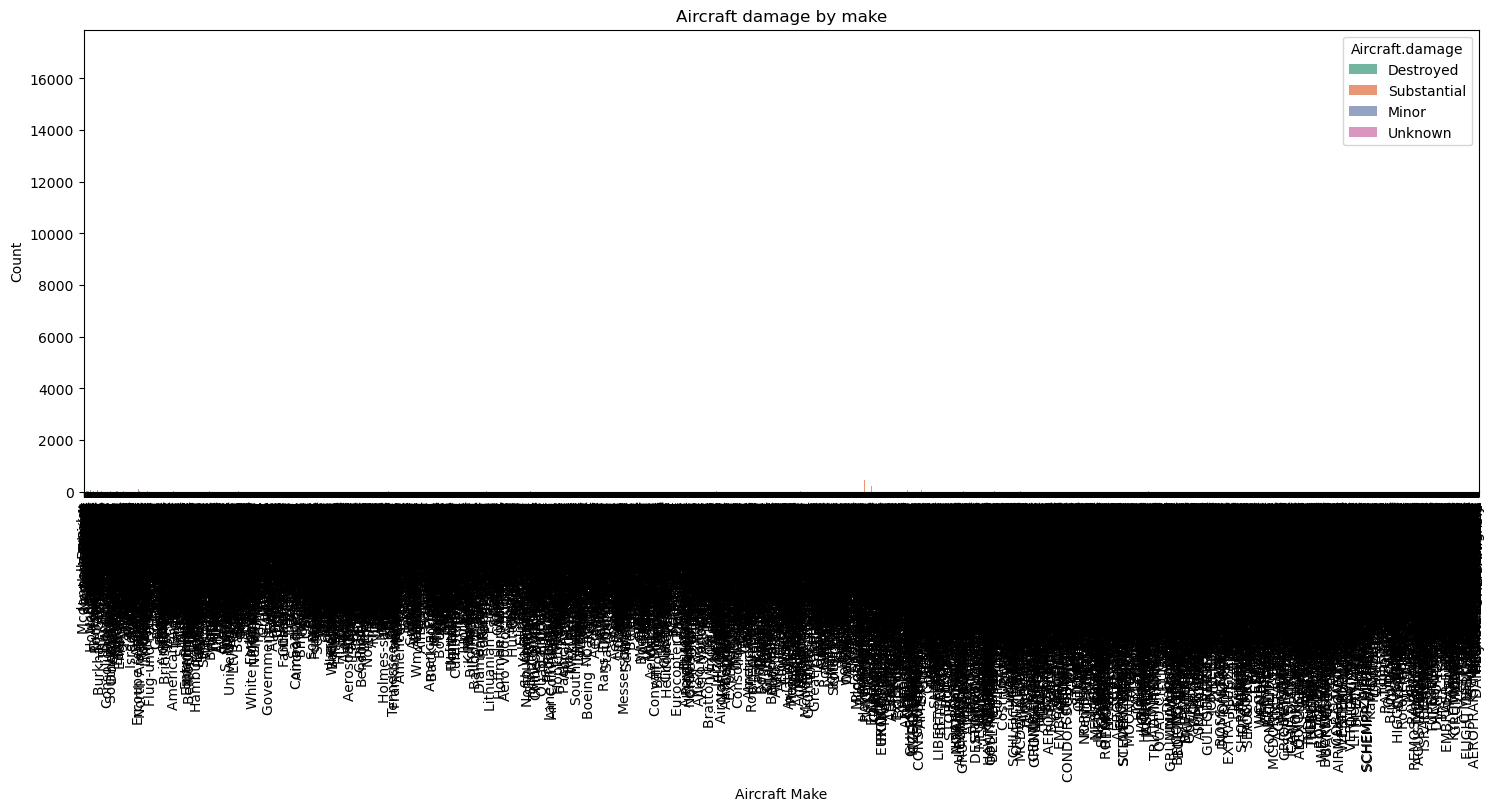

In [ ]:
#Aircraft damage by make

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
sns.countplot(x='Make', hue='Aircraft.damage', data=df_aviation, palette='Set2')

plt.title('Aircraft damage by make')
plt.xlabel('Aircraft Make')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



/var/folders/22/ftbxzs_n6gz017c8fmtp7ys80000gn/T/ipykernel_6851/3712747100.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Make', data=damage_totals_sorted, palette='Set2')


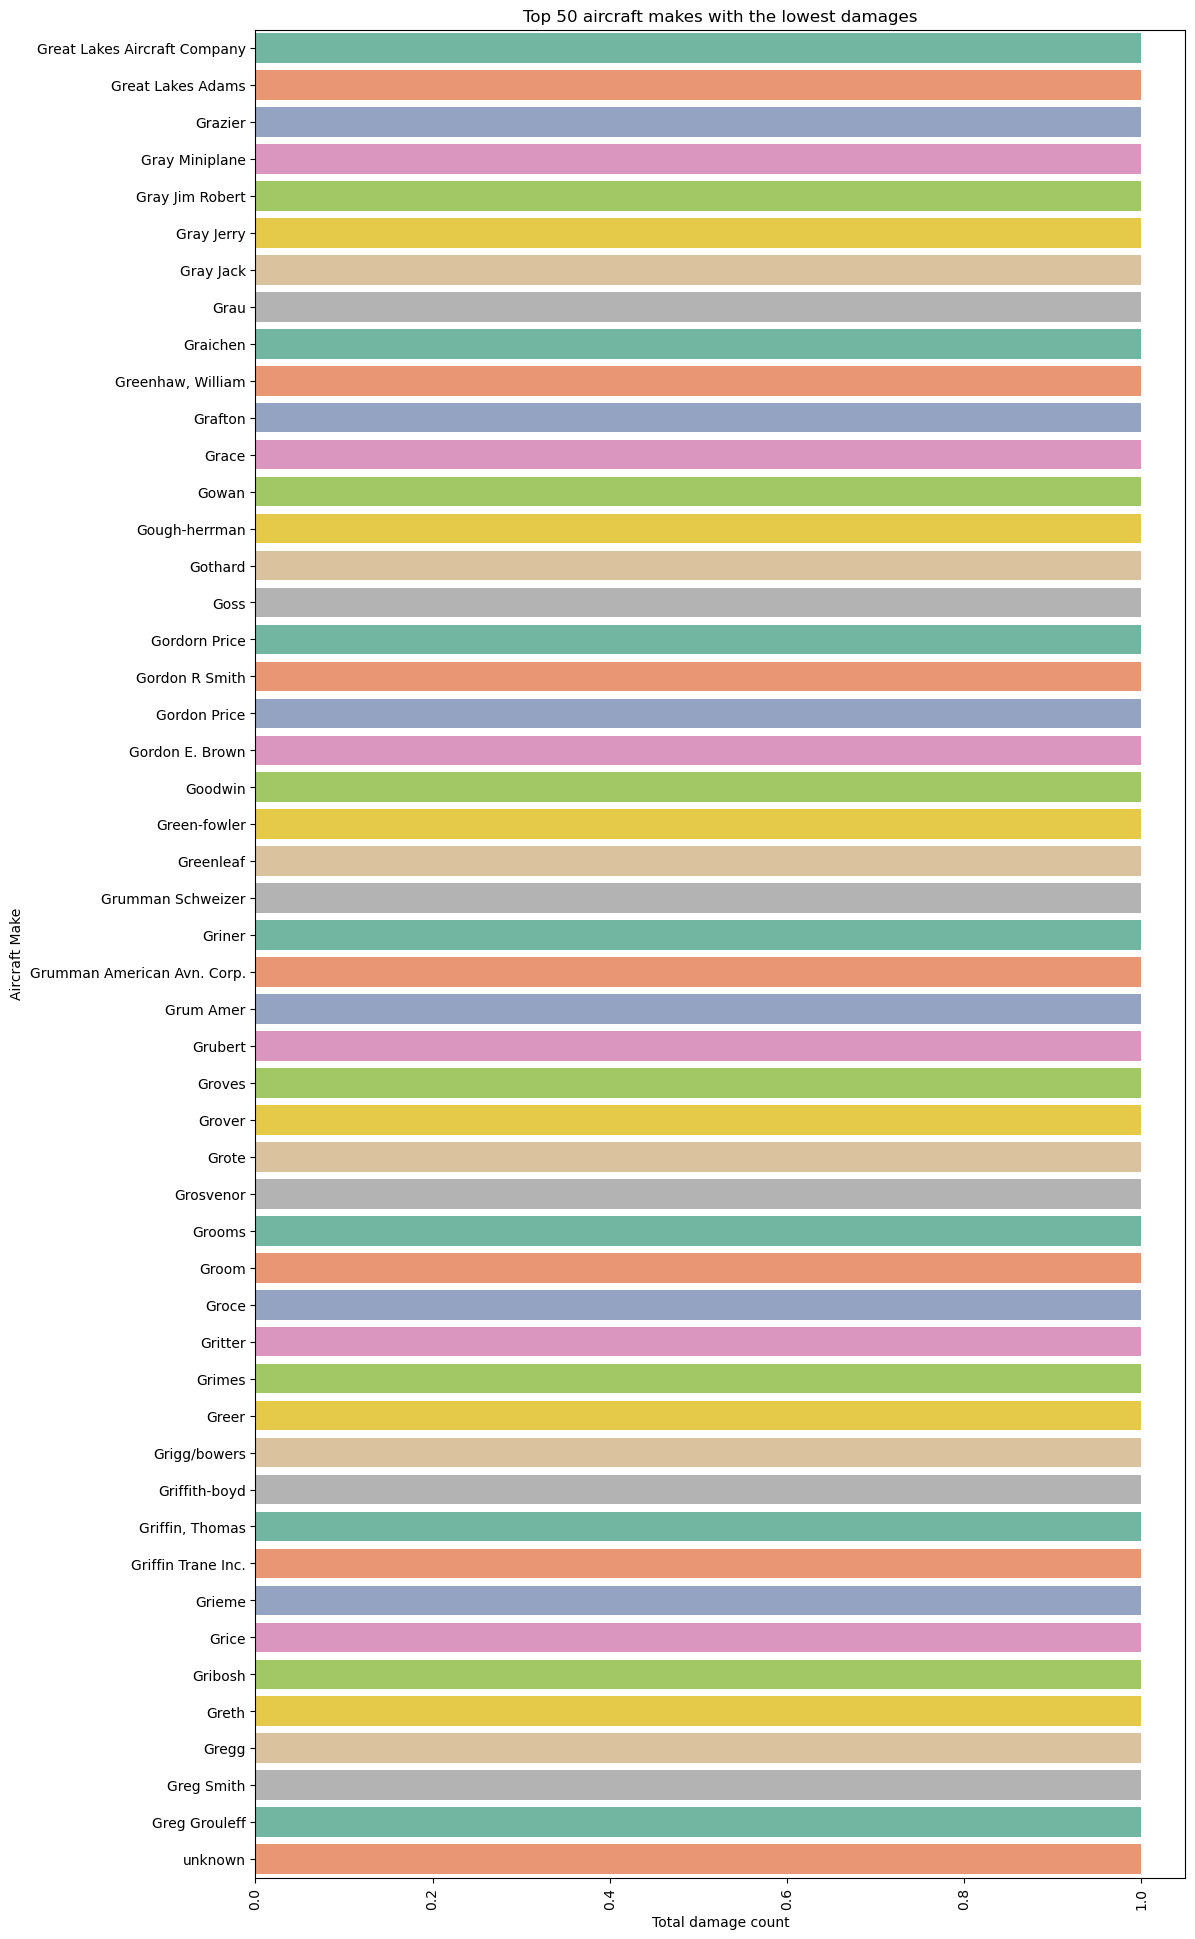

In [ ]:
#Aircraft damage by make

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

damage_counts = df_aviation.groupby(['Make', 'Aircraft.damage']).size().reset_index(name='Count')
damage_totals = damage_counts.groupby('Make')['Count'].sum().reset_index()
damage_totals_sorted = damage_totals.sort_values(by='Count', ascending=False).tail(50)

plt.figure(figsize=(12,24))
sns.barplot(x='Count', y='Make', data=damage_totals_sorted, palette='Set2')

plt.title('Top 50 aircraft makes with the lowest damages')
plt.xlabel('Total damage count')
plt.ylabel('Aircraft Make')
plt.xticks(rotation=90)
plt.show()


In [30]:
make_accident_counts = df_aviation.groupby(['Make', 'Aircraft.damage']).size().reset_index(name='AccidentCount', drop=False)
make_accident_counts = make_accident_counts.sort_values(by='AccidentCount', ascending=False)
make_accident_counts

,Make,Aircraft.damage,AccidentCount
1850,Cessna,Substantial,17038
6595,Piper,Substantial,8684
1848,Cessna,Destroyed,4733
1556,CESSNA,Substantial,4230
6593,Piper,Destroyed,3107
...,...,...,...
3615,Gowan,Substantial,1
3611,Gough-herrman,Destroyed,1
3610,Gothard,Substantial,1
3609,Goss,Destroyed,1


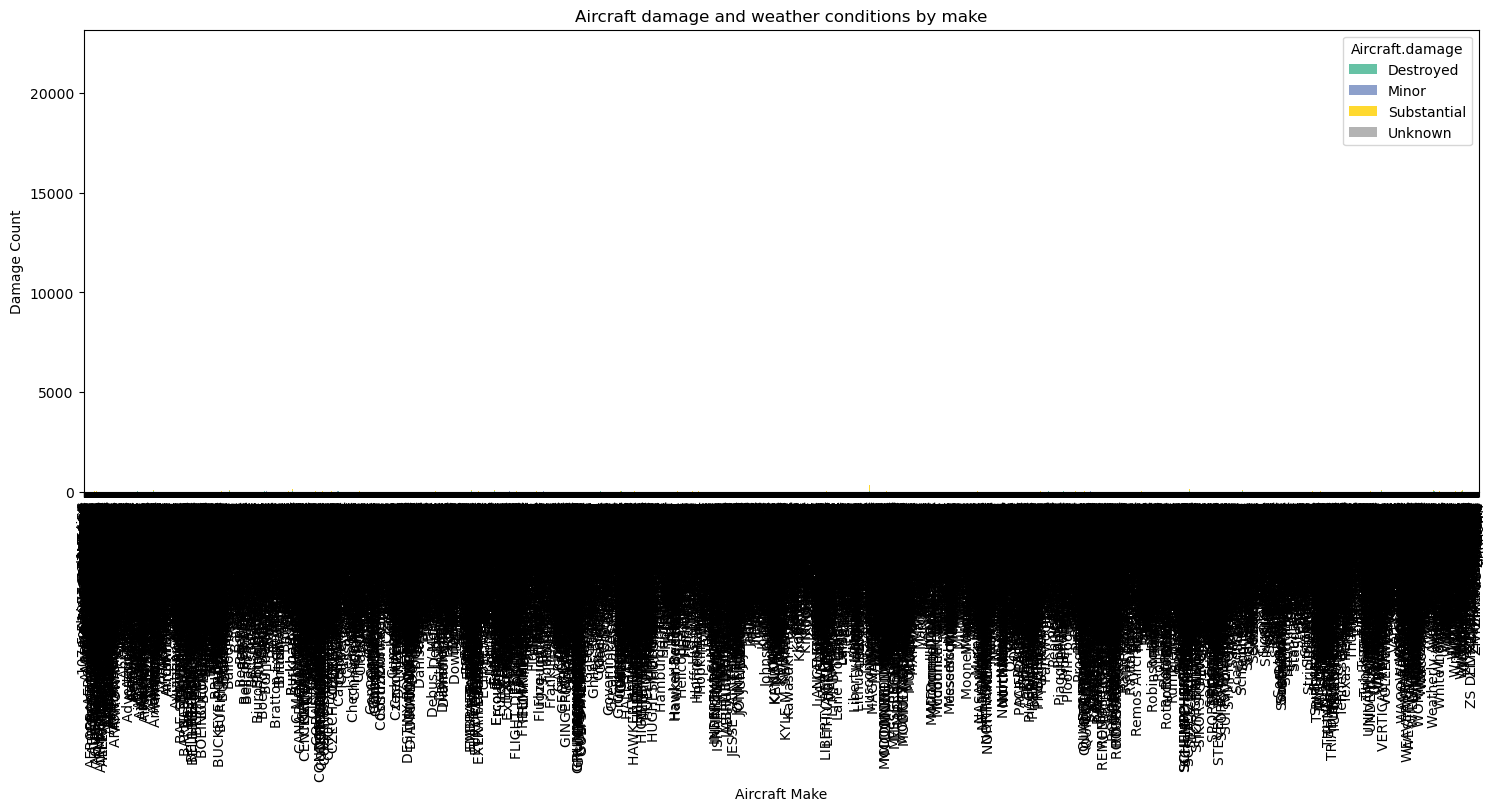

In [ ]:
damage_weather_counts = df_aviation.groupby(['Make', 'Aircraft.damage', 'Weather.Condition']).size().reset_index(name='Count')
pivot_data = damage_weather_counts.pivot_table(index='Make', columns=['Aircraft.damage'], values='Count', aggfunc='sum')

pivot_data.plot(kind='bar', stacked=True, figsize=(18,6), cmap='Set2')

plt.title('Aircraft damage and weather conditions by make')
plt.xlabel('Aircraft Make')
plt.ylabel('Damage Count')

plt.show()

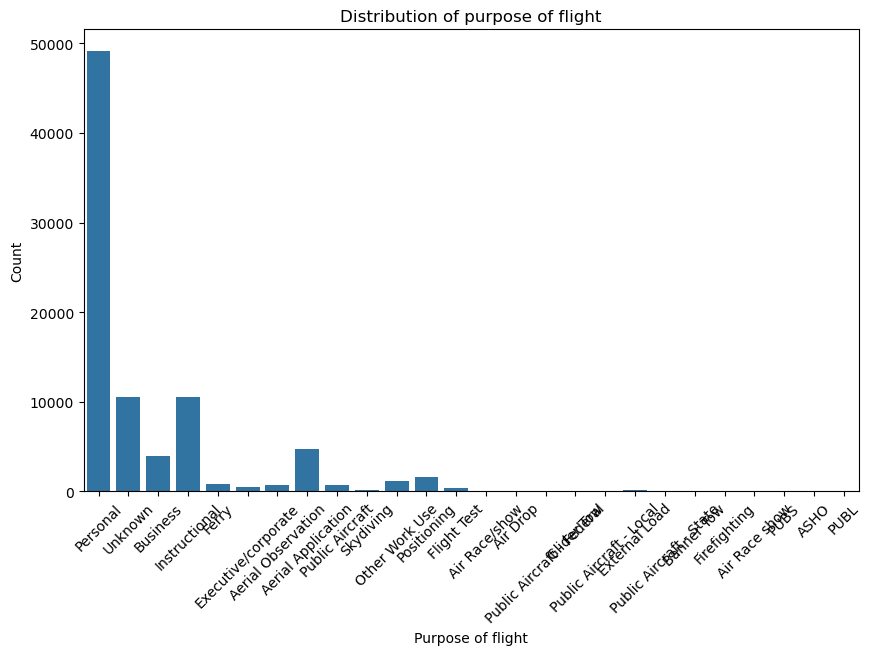

In [ ]:
#Purpose of flight

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='Purpose.of.flight', data=df_aviation)

plt.title('Distribution of purpose of flight')
plt.xlabel('Purpose of flight')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

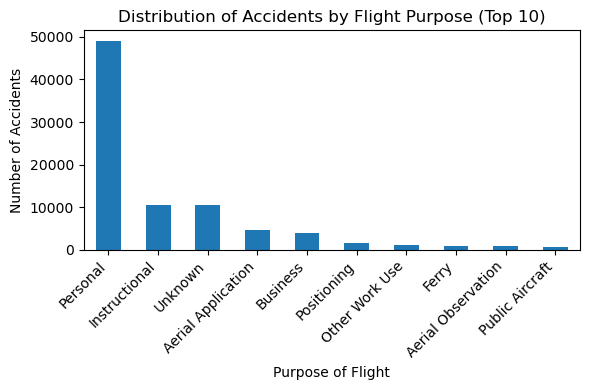

In [29]:
top_10_purposes = df_aviation['Purpose.of.flight'].value_counts().nlargest(10).sort_values(ascending=False)


plt.figure(figsize=(6, 4))
top_10_purposes.plot(kind='bar')
plt.title('Distribution of Accidents by Flight Purpose (Top 10)')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()


plt.show()

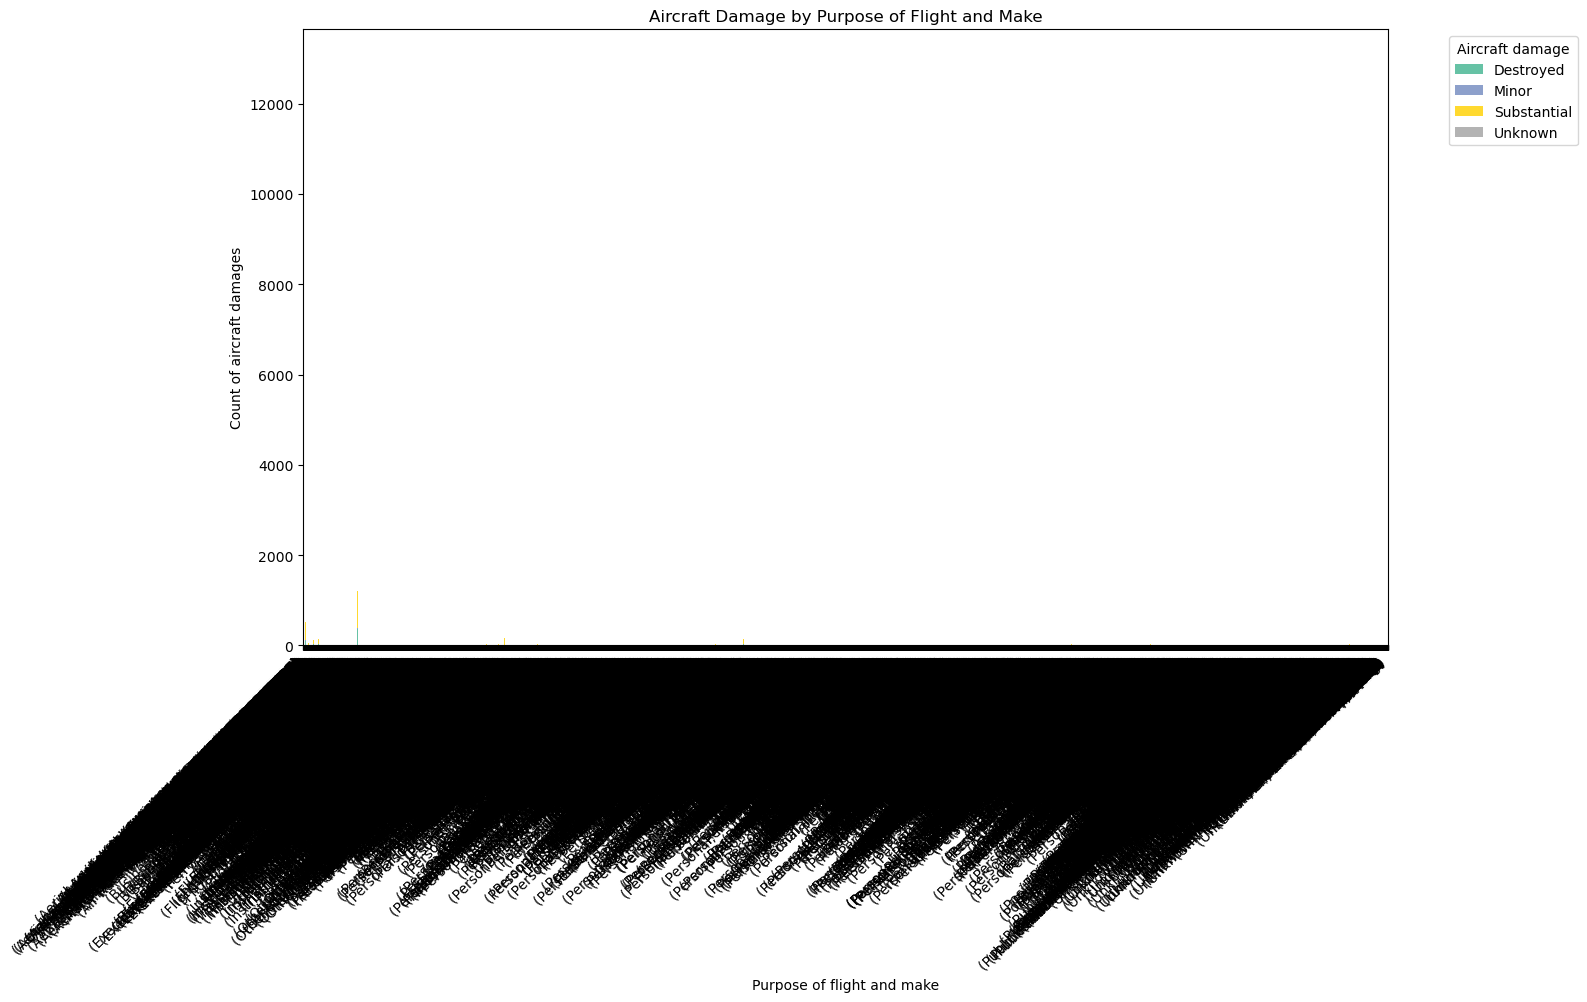

In [ ]:
pivot_data = df_aviation.pivot_table(index=['Purpose.of.flight', 'Make'], columns='Aircraft.damage', aggfunc='size', fill_value=0)
pivot_data.plot(kind='bar', stacked=True, figsize=(14,8), colormap='Set2')

plt.title('Aircraft Damage by Purpose of Flight and Make')
plt.xlabel('Purpose of flight and make')
plt.ylabel('Count of aircraft damages')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Aircraft damage', bbox_to_anchor=(1.05,1), loc='upper left')

plt.show()

7. Conclusion and Recommendations

In [ ]:
Personal flights contribute to a significant number of accidents. In this regard, it is recommended that comprehensive education and training prggrams for personal flights should be provided for this purpose.top_10_purposes

Cessna and piper aircraft makes seem to have the most incidences of accidents unlike the Gowan, Gough-herrman, Goss and Gothard that seem to have a lower risk for accidents. This notwithstanding it is recommended that aviation safety, rigorous maintenance and inspection programs must be put in place and implemented to the letter. Also the latter aircrafts are recommended for investment.

Most accidents seem to occur in good weather conditions. This maybe due to complacency of the pilots by pilots hence it is recommended that responsible flying be encourage through awareness campaigns and trainings